### BFS adjusted

In [1]:
from data.graph_data import *
import ba_utils.visualization as visualization
import ba_utils.orderings as orderings
import ba_utils.neighborhoods as neighborhoods

import heapq
import networkx as nx
import matplotlib.pyplot as plt

{'t_1905': {'nodes': [{'id': 8, 'name': 'Artist 8', 'num_exhibitions': 3}, {'id': 21, 'name': 'Artist 21', 'num_exhibitions': 2}, {'id': 2, 'name': 'Artist 2', 'num_exhibitions': 4}, {'id': 15, 'name': 'Artist 15', 'num_exhibitions': 6}, {'id': 9, 'name': 'Artist 9', 'num_exhibitions': 2}, {'id': 22, 'name': 'Artist 22', 'num_exhibitions': 2}, {'id': 3, 'name': 'Artist 3', 'num_exhibitions': 4}, {'id': 16, 'name': 'Artist 16', 'num_exhibitions': 7}, {'id': 10, 'name': 'Artist 10', 'num_exhibitions': 3}, {'id': 23, 'name': 'Artist 23', 'num_exhibitions': 2}, {'id': 4, 'name': 'Artist 4', 'num_exhibitions': 3}, {'id': 17, 'name': 'Artist 17', 'num_exhibitions': 6}, {'id': 11, 'name': 'Artist 11', 'num_exhibitions': 6}, {'id': 24, 'name': 'Artist 24', 'num_exhibitions': 1}, {'id': 5, 'name': 'Artist 5', 'num_exhibitions': 3}, {'id': 18, 'name': 'Artist 18', 'num_exhibitions': 3}, {'id': 19, 'name': 'Artist 19', 'num_exhibitions': 2}, {'id': 12, 'name': 'Artist 12', 'num_exhibitions': 6}, 

In [2]:
def calculate_priority(graph, current_node, neighbor):
    """
    Calculate priority for a neighbor node based on edge weight, degree, and proximity.

    Args:
        graph: The NetworkX graph.
        current_node: The current node in traversal.
        neighbor: The neighbor node for which priority is calculated.

    Returns:
        float: The priority value. Lower values have higher priority.
    """
    edge_weight = graph[current_node][neighbor].get('weight', 1)  # Default weight is 1
    degree = graph.degree(neighbor)  # Higher degree = more connections
    common_neighbors = len(list(nx.common_neighbors(graph, current_node, neighbor)))  # Number of common neighbors

    # Priority formula: combine edge weight, degree, and common neighbors
    # Negative because we use a min-heap (lower priority = higher value)
    return -edge_weight + 1 / (degree + 1) - common_neighbors

def sort_by_priority(graph, current_node, neighbors):
    return sorted(neighbors, key=lambda neighbor: calculate_priority(graph, current_node, neighbor))

def get_priority_bfs_ordering(graphs, start_nodes=None):
    """
    Generate a priority-based BFS ordering for multiple graphs.
    This function performs a priority-based Breadth-First Search (BFS) traversal on each graph provided in the `graphs` dictionary. It calculates the ordering of nodes based on dynamically computed priorities. The traversal can start from specified nodes for each graph if provided.
    Parameters:
        graphs (dict): A dictionary where each key is a timestamp and each value is a graph object containing nodes and edges.
        start_nodes (dict, optional): A dictionary mapping each timestamp to its respective starting node. If not provided or a start node is not specified for a timestamp, the traversal starts from the first node in the sorted list of nodes.
    Returns:
        dict: A dictionary mapping each timestamp to a list representing the BFS ordering of nodes based on priority.
    """
    bfs_ordering = {}

    # Loop through each graph/timestamp
    for timestamp, graph in graphs.items():
        sorted_nodes = sorted(graph.nodes)

        visited = set()
        ordering = []
        pq = []  # Priority queue (min-heap)

        # Initialize the priority queue with the start node or the first node
        start_node = start_nodes.get(timestamp) if start_nodes and timestamp in start_nodes else None
        if start_node and start_node in graph.nodes:
            heapq.heappush(pq, (0, start_node))  # Push (priority, node)
        else:
            heapq.heappush(pq, (0, sorted_nodes[0]))

        # Priority BFS traversal
        while pq:
            _, current_node = heapq.heappop(pq)  # Pop the node with the highest priority
            if current_node not in visited:
                visited.add(current_node)
                ordering.append(current_node)

                # Get neighbors and calculate their priorities
                neighbors = graph.neighbors(current_node)
                for neighbor in neighbors:
                    if neighbor not in visited:
                        priority = calculate_priority(graph, current_node, neighbor)
                        heapq.heappush(pq, (priority, neighbor))
                        print(f"Priority for {neighbor}: {priority}")
                        print("The priority queue is: ", pq)

        bfs_ordering[timestamp] = ordering

    return bfs_ordering

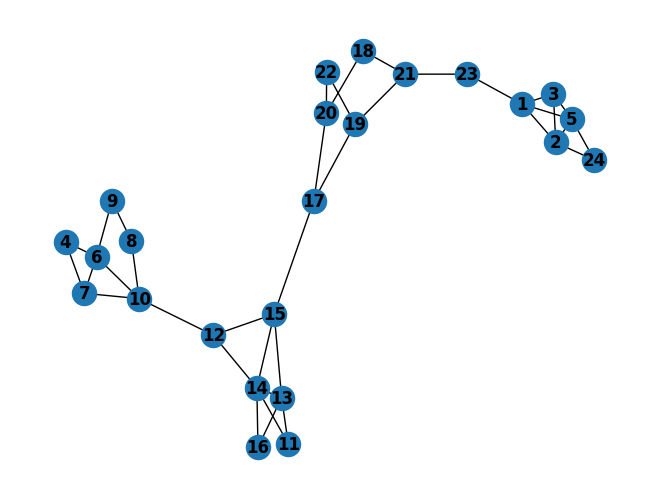

In [3]:
G = nx.Graph()
G.add_edge(1, 2, weight=1)
G.add_edge(1, 3, weight=1)
G.add_edge(1, 5, weight=1)
G.add_edge(2, 3, weight=1)
G.add_edge(3, 5, weight=1)
G.add_edge(2, 5, weight=1)
G.add_edge(4, 6, weight=1)
G.add_edge(7, 4, weight=1)
G.add_edge(7, 6, weight=1)
# Adding more nodes and edges to create a bigger graph with 24 nodes and at least 4 different communities
G.add_edges_from([
    (8, 9, {'weight': 1}), (8, 10, {'weight': 1}), 
    (10, 12, {'weight': 1}), (11, 13, {'weight': 1}), (12, 14, {'weight': 1}),
    (13, 15, {'weight': 1}), (14, 16, {'weight': 1}), (15, 17, {'weight': 1}),
    (17, 19, {'weight': 1}), (18, 20, {'weight': 1}),
    (19, 21, {'weight': 1}), (20, 22, {'weight': 1}), (21, 23, {'weight': 1}), 
    (23, 1, {'weight': 1}), (24, 2, {'weight': 1}),
     (6, 9, {'weight': 1}), (7, 10, {'weight': 1}), (14,15, {'weight': 1}),
    (11, 14, {'weight': 1}), (12, 15, {'weight': 1}), (13, 16, {'weight': 1}),
    (17, 20, {'weight': 1}), (18, 21, {'weight': 1}), (19, 22, {'weight': 1}),
     (24, 5, {'weight': 1}), (10, 6, {'weight': 1}), (13,14, {'weight': 1}),
])

nx.draw(G, with_labels=True, font_weight='bold')

Priority for 2: -2.8
The priority queue is:  [(-2.8, 2)]
Priority for 3: -2.75
The priority queue is:  [(-2.8, 2), (-2.75, 3)]
Priority for 5: -2.8
The priority queue is:  [(-2.8, 2), (-2.75, 3), (-2.8, 5)]
Priority for 23: -0.6666666666666667
The priority queue is:  [(-2.8, 2), (-2.75, 3), (-2.8, 5), (-0.6666666666666667, 23)]
Priority for 3: -2.75
The priority queue is:  [(-2.8, 5), (-2.75, 3), (-0.6666666666666667, 23), (-2.75, 3)]
Priority for 5: -3.8
The priority queue is:  [(-3.8, 5), (-2.8, 5), (-0.6666666666666667, 23), (-2.75, 3), (-2.75, 3)]
Priority for 24: -1.6666666666666667
The priority queue is:  [(-3.8, 5), (-2.8, 5), (-1.6666666666666667, 24), (-2.75, 3), (-2.75, 3), (-0.6666666666666667, 23)]
Priority for 3: -2.75
The priority queue is:  [(-2.8, 5), (-2.75, 3), (-2.75, 3), (-2.75, 3), (-0.6666666666666667, 23), (-1.6666666666666667, 24)]
Priority for 24: -1.6666666666666667
The priority queue is:  [(-2.8, 5), (-2.75, 3), (-2.75, 3), (-2.75, 3), (-0.6666666666666667, 2

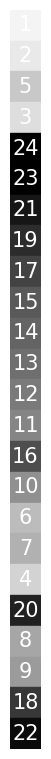

In [5]:
priority_ordering = get_priority_bfs_ordering({"t_1905": G})

data = {
    "t_1905": {
        "nodes": [{"id": n, "name": f"Artist {n}", "num_exhibitions": G.degree[n]} for n in G.nodes],
        "links": [{"source": u, "target": v, "weight": d['weight'], "influence": 0.0} for u, v, d in G.edges(data=True)],
        "num_exhibitions": max(G.degree[n] for n in G.nodes)
    }
}

visualization.draw_rug_plot_with_ids(data, priority_ordering)